# Python言語によるビジネスアナリティクス
## 実務家のための最適化，統計分析，機械学習（近代科学社）

## statsmodelsを用いた統計の例題と練習問題


### 線形回帰

http://logopt.com/data/Diamond.csv からダイアモンドの価格データを読み込み，線形回帰を適用する．

列は ["carat","colour","clarity","certification","price"] であり，他の情報から価格(price)の予測を行う．

1. データをpandasのデータフレームとして読み込む．
2. statsmodels.formula.apiを **smf** (stats model formula)の名前でインポートする．
3. smfの一般化線形モデル**glm**を用いてモデルインスタンスを生成する．
このとき，列名を用いた**式(formula)**を文字列で記述し引数**formula**で，データは引数**data**にデータフレームとして入力する．
4. モデルインスタンスの**fitメソッド**で学習を行う．
5. モデルインスタンスの**summary(2)**メソッドで結果を見る．

モデル式の**formula**の書き方については，教科書194ページを参照

In [5]:
import pandas as pd
%matplotlib inline
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


In [6]:
import statsmodels.formula.api as smf
model = smf.glm('price ~ carat + colour + clarity +certification', diamond) 
fit = model.fit()                                
print(fit.summary2())    

                      Results: Generalized linear model
Model:                   GLM                 AIC:               4931.3248     
Link Function:           identity            BIC:               148870958.0331
Dependent Variable:      price               Log-Likelihood:    -2452.7       
Date:                    2019-04-08 23:09    LL-Null:           -5827.9       
No. Observations:        308                 Deviance:          1.4887e+08    
Df Model:                12                  Pearson chi2:      1.49e+08      
Df Residuals:            295                 Scale:             5.0465e+05    
Method:                  IRLS                                                 
------------------------------------------------------------------------------
                       Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
------------------------------------------------------------------------------
Intercept              169.1760 255.0156   0.6634 0.5071  -330.6454   668.9

### サマリーの見方

- No. Observations : サンプル数 (=308)
- Df Model : 自由度(Degree of Freedom) 変数の数なので $12$   
- AIC : [赤池情報量基準(Akaike Information Criterion) ](https://ja.wikipedia.org/wiki/%E8%B5%A4%E6%B1%A0%E6%83%85%E5%A0%B1%E9%87%8F%E8%A6%8F%E6%BA%96)
($=4931.3248 = -2 \times 対数尤度 + 2 \times (自由度+1) = -2 \times (-2452.7) +2 \times (12+1)$ )　(小さいほどモデルの適合度が良い）
- Log-Likelihood: 尤度の対数（最大尤度のものを求めている）[最尤推定](https://ja.wikipedia.org/wiki/%E6%9C%80%E5%B0%A4%E6%8E%A8%E5%AE%9A)
- Corf. : 係数（一番上のInterceptはy切片）
- Std. Err. : 標準誤差
- z : 標準偏差．大きいほど係数が信頼できる
- P : P値（偶然|z|を超える確率）．小さいほど係数が信頼できる（以下の表参照）
- [0.025, 0.975] : 係数の信頼区間

| z (標準偏差) | P値 (確率） | 信頼度 |
|:-----------|------------:|:------------:|
| < -1.65 または > +1.65 | < 0.10 | 90%
| < -1.96 または > +1.96 | < 0.05 | 95%
| < -2.58 または > +2.58 |  < 0.01 | 99%  


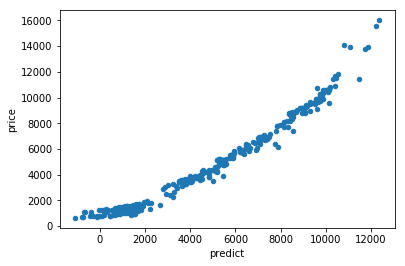

In [7]:
diamond['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
diamond.plot.scatter(x='predict',y='price'); #描画

### 問題

http://logopt.com/data/carprice.csv から車の価格データを読み込み，線形回帰による予測を行え．

車種(Type)，100マイル走る際のガロン数（gpm100），都市部での1ガロンあたりの走行距離（MPGcity），高速道路での１ガロン当たりの走行距離（MPGhighway）から，価格(Price)を予測せよ．

In [8]:
import pandas as pd
%matplotlib inline
cardate = pd.read_csv('http://logopt.com/data/carprice.csv', index_col=0)
cardate.head()

,Type,MinPrice,Price,MaxPrice,RangePrice,RoughRange,gpm100,MPGcity,MPGhighway
6,Midsize,14.2,15.7,17.3,3.1,3.09,3.8,22,31
7,Large,19.9,20.8,21.7,1.8,1.79,4.2,19,28
8,Large,22.6,23.7,24.9,2.3,2.31,4.9,16,25
9,Midsize,26.3,26.3,26.3,0.0,-0.01,4.3,19,27
10,Large,33.0,34.7,36.3,3.3,3.30,4.9,16,25


In [10]:
import statsmodels.formula.api as smf
model = smf.glm('MPGhighway ~ RoughRange + Type + Price + gpm100 + MPGcity', cardate) 
fit = model.fit()                                
print(fit.summary2())    

               Results: Generalized linear model
Model:               GLM               AIC:             166.9040
Link Function:       identity          BIC:             -87.1368
Dependent Variable:  MPGhighway        Log-Likelihood:  -73.452 
Date:                2019-04-08 23:10  LL-Null:         -311.69 
No. Observations:    48                Deviance:        59.969  
Df Model:            9                 Pearson chi2:    60.0    
Df Residuals:        38                Scale:           1.5781  
Method:              IRLS                                       
----------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept       70.7895   9.8591  7.1801 0.0000  51.4660 90.1129
Type[T.Large]   -0.0333   0.7825 -0.0426 0.9660  -1.5670  1.5004
Type[T.Midsize] -0.1678   0.7157 -0.2344 0.8146  -1.5705  1.2350
Type[T.Small]    0.8496   0.8233  1.0319 

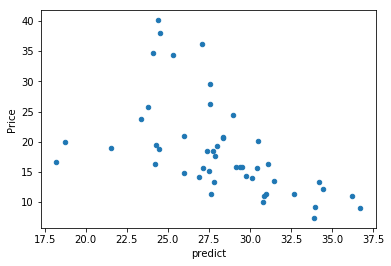

In [11]:
cardate['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
cardate.plot.scatter(x='predict',y='Price'); #描画

### 問題

広告のデータ http://logopt.com/data/Advertising.csv を読み込み，線形回帰による予測を行え．

テレビ(TV)，ラジオ(Radio)，新聞(Newspaper)への広告から売り上げ(Sales)を予測せよ．

In [13]:
import pandas as pd
%matplotlib inline
advedate = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col=0)
advedate.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
import statsmodels.formula.api as smf
model = smf.glm('Sales ~ TV + Radio + Newspaper', advedate) 
fit = model.fit()                                
print(fit.summary2())    

              Results: Generalized linear model
Model:              GLM              AIC:            780.3622 
Link Function:      identity         BIC:            -481.6449
Dependent Variable: Sales            Log-Likelihood: -386.18  
Date:               2019-04-08 23:10 LL-Null:        -1241.6  
No. Observations:   200              Deviance:       556.83   
Df Model:           3                Pearson chi2:   557.     
Df Residuals:       196              Scale:          2.8409   
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept    2.9389    0.3119   9.4223  0.0000   2.3276  3.5502
TV           0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Radio        0.1885    0.0086  21.8935  0.0000   0.1717  0.2054
Newspaper   -0.0010    0.0059  -0.1767  0.8597  -0.0125  0.0105


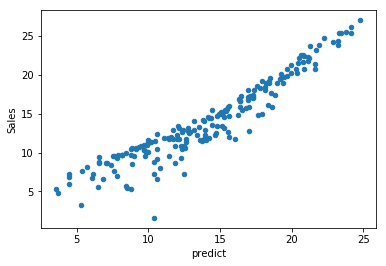

In [15]:
advedate['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
advedate.plot.scatter(x='predict',y='Sales'); #描画

### 問題

http://logopt.com/data/Boston.csv のBostonの住宅データを用いて回帰分析を行え．

データの詳細については，
https://archive.ics.uci.edu/ml/datasets/Housing
を参照せよ．

medvが住宅の価格で，他のデータ（犯罪率や人口など）から予測する．

In [16]:
import pandas as pd
%matplotlib inline
bostondate = pd.read_csv('http://logopt.com/data/Boston.csv', index_col=0)
bostondate.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
import statsmodels.formula.api as smf
model = smf.glm('medv ~ crim + nox + age + dis + tax', bostondate) 
fit = model.fit()                                
print(fit.summary2())    

               Results: Generalized linear model
Model:              GLM              AIC:            3507.6919 
Link Function:      identity         BIC:            26534.4870
Dependent Variable: medv             Log-Likelihood: -1747.8   
Date:               2019-04-08 23:10 LL-Null:        -1858.1   
No. Observations:   506              Deviance:       29648.    
Df Model:           5                Pearson chi2:   2.96e+04  
Df Residuals:       500              Scale:          59.296    
Method:             IRLS                                       
---------------------------------------------------------------
              Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------
Intercept     51.8686   3.4948 14.8417 0.0000  45.0190  58.7183
crim          -0.1871   0.0493 -3.7959 0.0001  -0.2837  -0.0905
nox          -21.7777   5.5583 -3.9180 0.0001 -32.6718 -10.8836
age           -0.0812   0.0197 -4.1146 0.0000  -0.1199 

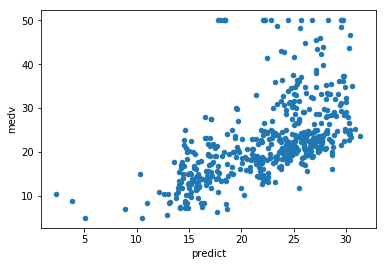

In [18]:
bostondate['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
bostondate.plot.scatter(x='predict',y='medv'); #描画

### 問題

http://logopt.com/data/SATGPA.csv データを用いて，2種類のSATの成績からGPAを予測せよ．

In [19]:
import pandas as pd
%matplotlib inline
SAT = pd.read_csv('http://logopt.com/data/SATGPA.csv', index_col=0)
SAT.head()

,MathSAT,VerbalSAT,GPA
1,580,420,2.90
2,670,530,2.83
3,680,540,2.90
4,630,640,3.30
5,620,630,3.61


In [20]:
import statsmodels.formula.api as smf
model = smf.glm('GPA ~ MathSAT + VerbalSAT', SAT) 
fit = model.fit()                                
print(fit.summary2())    

              Results: Generalized linear model
Model:              GLM              AIC:            16.4610 
Link Function:      identity         BIC:            -64.5663
Dependent Variable: GPA              Log-Likelihood: -5.2305 
Date:               2019-04-08 23:10 LL-Null:        -6.0804 
No. Observations:   24               Deviance:       2.1729  
Df Model:           2                Pearson chi2:   2.17    
Df Residuals:       21               Scale:          0.10347 
Method:             IRLS                                     
--------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
--------------------------------------------------------------
Intercept   2.7375    0.5632   4.8608  0.0000   1.6337  3.8413
MathSAT    -0.0004    0.0010  -0.3883  0.6978  -0.0023  0.0015
VerbalSAT   0.0011    0.0009   1.1952  0.2320  -0.0007  0.0029



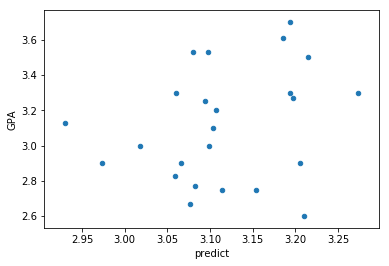

In [21]:
SAT['predict'] = fit.predict() #予測を行い，結果を'predict'列に追加
SAT.plot.scatter(x='predict',y='GPA'); #描画

### 一般化線形モデルについて

基本となる線形回帰だと，独立変数 $x^{(i)}$ を用いて従属変数 $y^{(i)}$ を推定する．上付き添え字の$(i)$ はトレーニングデータのインデックスを表す．評価関数は最小自乗誤差であり，それを最小にするような重みベクトル $w$ を求める．

通常の線形回帰（最小自乗モデル）は，一般化線形モデル的に見直すと以下のように解釈できる．

1. 従属変数 $y^{(i)}$ は平均 $\mu^{(i)}$，標準偏差 $\sigma$ の正規分布 $N(\mu^{(i)},\sigma^2)$ にしたがう．
2. 線形予測子 $z^{(i)}$ を独立変数 $x^{(i)}$ を用いて $z^{(i)} = w x^{(i)} $ と定義する．ここで $w$ は最適化するパラメータ（重み）である．
3. リンク関数 $g$ を用いて  $\mu^{(i)}$ と  $z^{(i)}$ を繋ぐが，線形モデルでは $g(\mu) =\mu$ である．

### ロジスティック回帰

titanicデータを用いる(データの詳細については教科書82ページ参照）．

従属変数（予測するもの）は*survived*の列で，生き残ったか($=1$)，否か($=0$)を表す．

このように $0$ か $1$ かを予測するのに線形回帰は不適当なので，ロジスティック回帰を用いる．

一般化線形モデル(glm)を使えば，ほぼ同じように予測できる（性別sexと客室クラスpclassだけを用いる）．

引数の*family* に *sm.families.Binomial()* を指定すれば良い．

一般化線形モデルでの仮定は以下のようになる．

1. 従属変数 $y^{{i}}$ は平均 $\mu^{(i)}$ （表が出る確率）のコイン投げの分布(2項分布:binomial distribution)にしたがう．
2. 線形予測子 $z^{(i)}$ を独立変数 $x^{(i)}$ を用いて $z^{(i)} = w x^{(i)} $ と定義する．(この部分は全部共通）
3. リンク関数 $g$ を用いて  $\mu^{(i)}$ と  $z^{(i)}$ を繋ぐが，$\mu$ は確率なので $[0,1]$ の範囲しかとらない，一方， $z$ は線形予測子なので $[-\infty,+\infty]$ の定義域をもつ．これを繋ぐために以下のリンク関数 $g$ を用いる．

$$z = g(\mu) = \log \left( \frac{\mu}{1-\mu} \right) $$

これをロジット関数とよぶ．
歴史的な都合で $g$ は $\mu$ から $z$ への写像となっているが，逆写像として考えた方がわかりやすい．すなわち，線形予測子 $z$ から分布の平均 $\mu$ を逆写像 $g^{-1}$ で写すのである．この関数は


$$\mu = \frac{ \exp (z) }{ 1+\exp (z)} $$ となり，いわゆるロジスティック関数である．


### 例題

titanic号で生存したか否かの[データセット](https://www.kaggle.com/c/titanic/data)にロジスティック回帰を適用してみる．


In [22]:
titanic = pd.read_csv('http://logopt.com/data/titanic.csv',index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [23]:
import statsmodels.api as sm
model = smf.glm(formula="Survived ~ Sex + Pclass + Fare + SibSp + Parch", data=titanic, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            828.7501  
Link Function:      logit            BIC:            -5194.4747
Dependent Variable: Survived         Log-Likelihood: -408.38   
Date:               2019-04-08 23:10 LL-Null:        -593.33   
No. Observations:   891              Deviance:       816.75    
Df Model:           5                Pearson chi2:   910.      
Df Residuals:       885              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       3.1473   0.3752   8.3895 0.0000  2.4121  3.8826
Sex[T.male]    -2.7594   0.1959 -14.0837 0.0000 -3.1434 -2.3754
Pclass         -0.8360   0.1268  -6.5905 0.0000 -1.0846 -0.5874
Fare            0.0034   0.0024   1.4508 0.1468 -0.0012

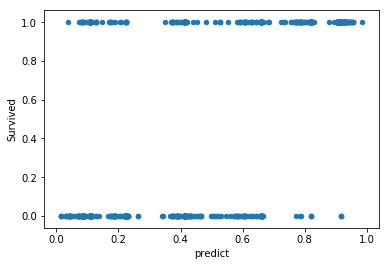

In [37]:
titanic['predict'] = res.predict()  #予測をpredict列に保管
titanic.plot.scatter(x='predict',y='Survived'); # 散布図に描画

### 問題

"http://logopt.com/data/cancer.csv" にある胸部癌か否かを判定するデータセットを用いて分類を行え．

最初の列diagnosisが癌か否かを表すものであり，'M'が悪性（malignant），'B'が良性（benign）である．

必要なら以下の文字列を切り貼りして用いよ．

formula = """diagnosis~radius_mean+texture_mean+texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+
concavity_mean+symmetry_mean+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+
compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst"""

In [29]:
cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
cancer2=cancer.replace({'M':1, 'B':0})
cancer2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720


In [32]:
import statsmodels.api as sm
model = smf.glm(formula = "diagnosis~radius_mean+texture_mean+texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+ concavity_mean+symmetry_mean+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+ compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst", data=cancer2, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

                     Results: Generalized linear model
Model:                    GLM                  AIC:                nan     
Link Function:            logit                BIC:                nan     
Dependent Variable:       diagnosis            Log-Likelihood:     nan     
Date:                     2019-04-08 23:16     LL-Null:            -375.72 
No. Observations:         569                  Deviance:           nan     
Df Model:                 17                   Pearson chi2:       1.31e+03
Df Residuals:             551                  Scale:              1.0000  
Method:                   IRLS                                             
---------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
---------------------------------------------------------------------------
Intercept               -48.2702  21.8490 -2.2093 0.0272  -91.0935  -5.4469
radius_mean              -8.1332 

/Users/okubo_yui/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/okubo_yui/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/Users/okubo_yui/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:933: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/Users/okubo_yui/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:933: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


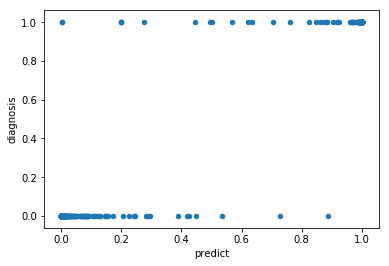

In [33]:
cancer2['predict'] = res.predict()  #予測をpredict列に保管
cancer2.plot.scatter(x='predict',y='diagnosis'); # 散布図に描画

### 問題

"http://logopt.com/data/hospital.csv" にある病院のデータを用いてロジスティック回帰を行え．

従属変数*died*は死亡したか否かを表し，これを年齢(age)，施術(procedure)，性別(gender)，救急か否か(type)，入院日数(los: length of stay)から予測する． 

必要なら以下の文字列を使用しても良い．

formula="died~procedure+age+gender+los+type" 


In [47]:
hospital = pd.read_csv("http://logopt.com/data/hospital.csv", index_col=0)
hospital.head()

,died,procedure,age,gender,los,type
1,0,1,73,0,51,0
2,0,0,67,0,30,1
3,0,1,69,0,43,0
4,0,1,65,0,32,0
5,0,1,79,0,42,1


In [48]:
import statsmodels.api as sm
model = smf.glm(formula="died~procedure+age+gender+los+type", data=hospital, family= sm.families.Binomial() )
res = model.fit() #学習
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            316.5231   
Link Function:      logit            BIC:            -14499.5868
Dependent Variable: died             Log-Likelihood: -152.26    
Date:               2019-04-08 22:40 LL-Null:        -179.55    
No. Observations:   1959             Deviance:       304.52     
Df Model:           5                Pearson chi2:   1.01e+04   
Df Residuals:       1953             Scale:          1.0000     
Method:             IRLS                                        
-----------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
-----------------------------------------------------------------
Intercept  -11.4223    3.2249  -3.5419  0.0004  -17.7430  -5.1016
procedure    3.8633    0.6535   5.9116  0.0000    2.5825   5.1442
age          0.0953    0.0438   2.1769  0.0295    0.0095   0.1811
gender      -0.7181    0.3523  -2.0

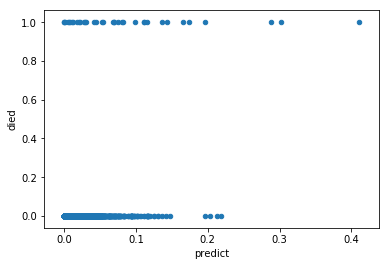

In [49]:
hospital['predict'] = res.predict()  #予測をpredict列に保管
hospital.plot.scatter(x='predict',y='died'); # 散布図に描画

### Poisson回帰

Poisson回帰は救急車の出動回数などの負の値をとらない**カウントデータ**もしくはその発生率を予測する際に用いられる．

この場合には，従属変数が $0$ 以上の値になるので，一般化線形モデルでの仮定は以下のようになる．

1. 従属変数 $y^{{i}}$ は平均 $\mu^{(i)}$ のPoisson分布にしたがう．
2. 線形予測子 $z^{(i)}$ を独立変数 $x^{(i)}$ を用いて $z^{(i)} = w x^{(i)} $ と定義する．(この部分は全部共通）
3. リンク関数 $g$ を用いて  $\mu^{(i)}$ と  $z^{(i)}$ を繋ぐが，$\mu$ は $0$ 以上で $z$ は $[-\infty,+\infty]$ の定義域をもつ．これを繋ぐために以下のリンク関数 $g$ を用いる．

$$z = g(\mu) = \log (\mu)$$

$g$ の逆写像は指数関数
$$ \mu = \exp (z) $$ である．

一般化線形モデル(glm)を使えば，ほぼ同じように予測できる．

引数の*family* に *sm.families.Poisson()* を指定すれば良い．

### 例題

"http://logopt.com/data/hospital-stay.csv" にある病院の入院日数のデータセットを用いてPoisson回帰を解説する．
従属変数である*los*（入院日数：length of stay)を，性別(gender)，救急か否か(type1)，75歳以上か(age75)から予測する．

入院日数は負の値をとらない，いわゆるカウントデータであるので，Poisson回帰を適用する．

In [50]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [51]:
hospital = pd.read_csv("http://logopt.com/data/hospital-stay.csv",index_col=0)
hospital.head()

,los,gender,type1,age75
1,53,0,1,0
2,30,0,1,0
3,28,0,1,1
4,22,0,1,0
5,25,0,1,0


In [52]:
model = smf.glm(formula="los ~ gender + type1 + age75 ", data=hospital, family= sm.families.Poisson() )
res = model.fit()
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            9178.5450  
Link Function:      log              BIC:            -10080.9611
Dependent Variable: los              Log-Likelihood: -4585.3    
Date:               2019-04-08 22:45 LL-Null:        -4975.9    
No. Observations:   1798             Deviance:       3364.0     
Df Model:           3                Pearson chi2:   4.16e+03   
Df Residuals:       1794             Scale:          1.0000     
Method:             IRLS                                        
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept     1.1822    0.0276  42.8441  0.0000   1.1282   1.2363
gender       -0.1475    0.0218  -6.7523  0.0000  -0.1903  -0.1047
type1         0.6280    0.0258  24.3094  0.0000   0.5774   0.6787
age75         0.1298    0.0232   5.

### 問題
"http://logopt.com/data/fishing.csv" にある魚の数を予測するためのデータセットにPoisson回帰を適用せよ．
従属変数は魚の数を表す totabundであり，それを密度(density)，平均深度(meandepth)，年度(year)から予測せよ．

必要なら以下の文字列を用いよ．

formula="totabund ~ density + meandepth + year "


In [53]:
fish = pd.read_csv("http://logopt.com/data/fishing.csv",index_col=0)
fish.head()

,site,totabund,density,meandepth,year,period,sweptarea
1,1,76,0.002070,804,1978,1977-1989,36710.000000
2,2,161,0.003520,808,2001,2000-2002,45741.253906
3,3,39,0.000981,809,2001,2000-2002,39775.000000
4,4,410,0.008039,848,1979,1977-1989,51000.000000
5,5,177,0.005933,853,2002,2000-2002,29831.251953


In [54]:
model = smf.glm(formula="totabund ~ density + meandepth + year ", data=fish, family= sm.families.Poisson() )
res = model.fit()
print(res.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            6879.4441
Link Function:      log              BIC:            5185.2509
Dependent Variable: totabund         Log-Likelihood: -3435.7  
Date:               2019-04-08 22:52 LL-Null:        -14511.  
No. Observations:   147              Deviance:       5898.9   
Df Model:           3                Pearson chi2:   5.45e+03 
Df Residuals:       143              Scale:          1.0000   
Method:             IRLS                                      
--------------------------------------------------------------
               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------
Intercept     31.4793   1.2288  25.6176 0.0000 29.0709 33.8877
density       80.4678   0.7877 102.1603 0.0000 78.9240 82.0116
meandepth     -0.0003   0.0000 -42.6889 0.0000 -0.0003 -0.0003
year          -0.0131   0.0006 -21.1652 0.0000 -0.0143 -0.0119

